## Introduction to Object Detection using Jetson Nano
In this IPython notebook, you will learn about object detection using the Jetson Nano platform. Object detection is a computer vision technique used to locate and classify objects within images or video frames.

### Setup
Before we begin, we need to set up our environment and configure necessary paths:

In [9]:
JETSON_INTERFACE_PATH = '../../jetson-inference'
JETSON_INTERFACE_SSD_PATH = f'{JETSON_INTERFACE_PATH}/python/training/detection/ssd'
DATA_DIR='/nvdli-nano/data/objectdetection/images/fruit'
MODEL_DIR='/nvdli-nano/data/objectdetection/model/fruit'
TEST_DIR=f'{DATA_DIR}/test'
DEFAULT_PRETRAINED_MODEL=f'{JETSON_INTERFACE_SSD_PATH}/models/mobilenet-v1-ssd-mp-0_675.pth'
DETECTED_DIR = f'{TEST_DIR}/detected' 
import os
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)
    os.makedirs(DETECTED_DIR)

### Setting Up Necessary Libraries
We will append the Jetson SSD path to the system path to access the required modules:

In [10]:
import sys
sys.path.append(os.path.abspath(JETSON_INTERFACE_SSD_PATH))

### Configuration
We'll define some configuration parameters for our training process:

In [11]:
NUM_EPOCHS = 10
BATCH = 4
LR = 0.01

### Dataset Preparation
We'll download the dataset for object detection, which includes images of fruits (Apple, Orange, Banana, Strawberry):

In [ ]:
!python3 {JETSON_INTERFACE_SSD_PATH}/open_images_downloader.py --max-image=2500 --class-names "Apple,Orange,Banana,Strawberry" --data={DATA_DIR}

### Data Visualization
we'll visualize the dataset images (which we will detect object on later)

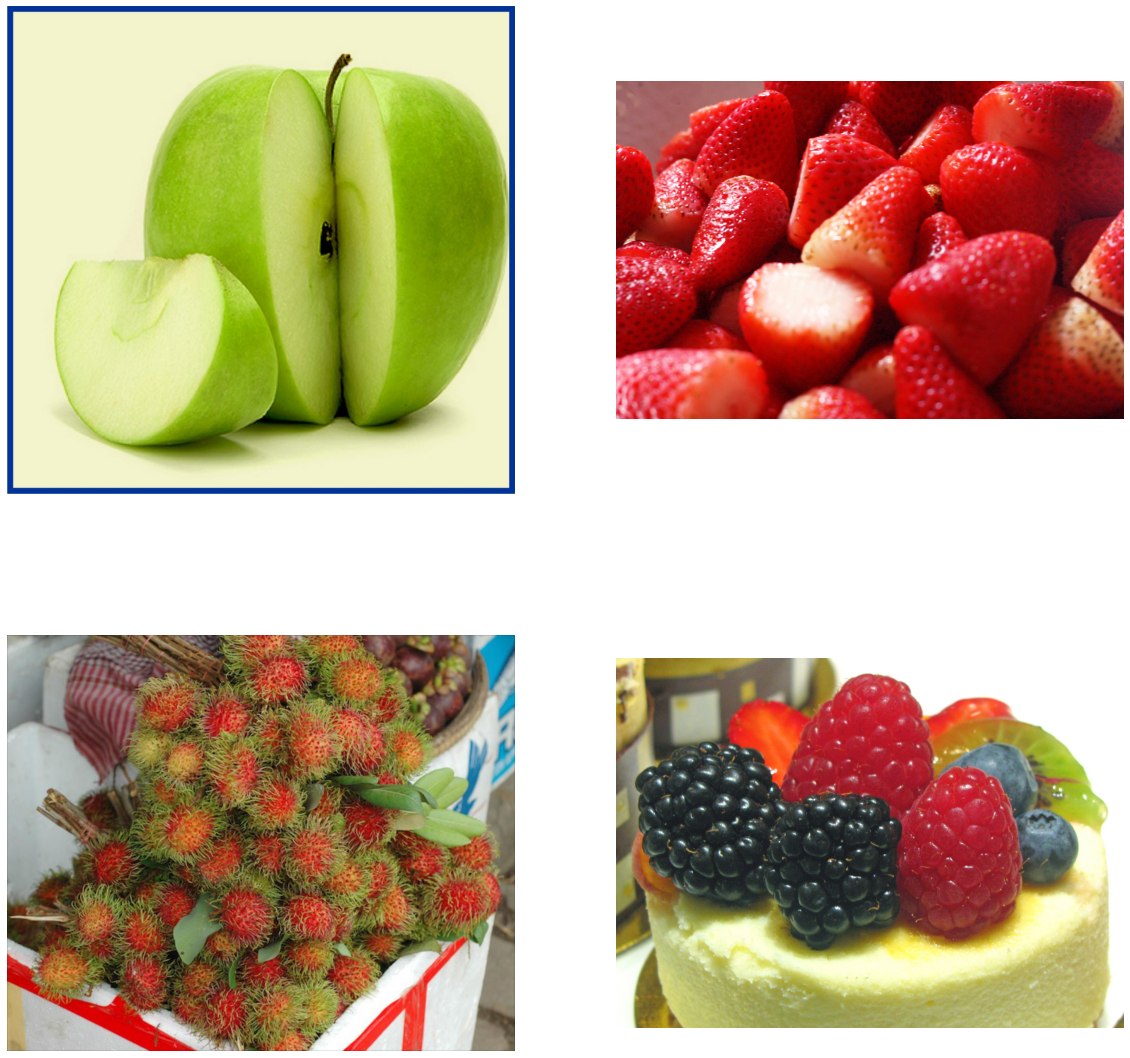

In [12]:
import random
import matplotlib.pyplot as plt

images = []
for image in os.listdir(TEST_DIR):
    images.append(os.path.join(TEST_DIR, image))

plt.figure(1, figsize=(20, 20))
plt.axis('off')
n = 0
for i in range(4):
  n += 1
  random_img = random.choice(images)
  imgs = plt.imread(random_img)
  plt.subplot(2, 2, n)
  plt.axis('off')
  plt.imshow(imgs)

plt.show()

### Pretrained Model
If a pretrained model is not available, we'll download one:

In [ ]:
if not os.path.exists(DEFAULT_PRETRAINED_MODEL):
    os.system(f"wget --quiet --show-progress --progress=bar:force:noscroll --no-check-certificate https://nvidia.box.com/shared/static/djf5w54rjvpqocsiztzaandq1m3avr7c.pth -O {DEFAULT_PRETRAINED_MODEL}")

### Model Training
We'll train our object detection model using the downloaded dataset and pretrained model:

In [ ]:
!python3 {JETSON_INTERFACE_SSD_PATH}/train_ssd.py --data={DATA_DIR} --model-dir={MODEL_DIR} --batch-size={BATCH} --epochs={NUM_EPOCHS} --lr={LR} --pretrained-ssd={DEFAULT_PRETRAINED_MODEL}

### Model Conversion
We'll convert our trained model into the ONNX format for inference:

In [ ]:
!python3 {JETSON_INTERFACE_SSD_PATH}/onnx_export.py --model-dir={MODEL_DIR}

### Object Detection
Now, we'll perform object detection on test images using our trained model:

In [13]:
!detectnet --model={MODEL_DIR}/ssd-mobilenet.onnx --labels={MODEL_DIR}/labels.txt \
          --input-blob=input_0 --output-cvg=scores --output-bbox=boxes \
            "$TEST_DIR/*.jpg" {DETECTED_DIR}/fruit_%i.jpg

[video]  created imageLoader from file:///nvdli-nano/data/objectdetection/images/fruit/test/*.jpg
------------------------------------------------
imageLoader video options:
------------------------------------------------
  -- URI: file:///nvdli-nano/data/objectdetection/images/fruit/test/*.jpg
     - protocol:  file
     - location:  /nvdli-nano/data/objectdetection/images/fruit/test/*.jpg
     - extension: jpg
  -- deviceType: file
  -- ioType:     input
  -- codec:      unknown
  -- width:      0
  -- height:     0
  -- frameRate:  0.000000
  -- bitRate:    0
  -- numBuffers: 4
  -- zeroCopy:   true
  -- flipMethod: none
  -- loop:       0
  -- rtspLatency 2000
------------------------------------------------
[video]  created imageWriter from file:///nvdli-nano/data/objectdetection/images/fruit/test/detected/fruit_%i.jpg
------------------------------------------------
imageWriter video options:
------------------------------------------------
  -- URI: file:///nvdli-nano/data/obje

### Result Visualization
Finally, we'll visualize the detection results:

In [ ]:
import random
import matplotlib.pyplot as plt

images = []
for image in os.listdir(DETECTED_DIR):
    images.append(os.path.join(DETECTED_DIR, image))

plt.figure(1, figsize=(20, 20))
plt.axis('off')
n = 0
for i in range(4):
  n += 1
  random_img = random.choice(images)
  imgs = plt.imread(random_img)
  plt.subplot(2, 2, n)
  plt.axis('off')
  plt.imshow(imgs)

plt.show()

By following this notebook, you'll gain a better understanding of deep learning-based object detection using the Jetson Nano platform. Feel free to modify the parameters and experiment with different configurations to further enhance your learning experience.